In [21]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout

In [22]:
df = yf.download("BAC", start="2015-01-01", end="2025-01-01")
df = df[["Close"]].dropna()
df.head()

/tmp/ipython-input-22-2847790120.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("BAC", start="2015-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,BAC
Date,
2015-01-02,14.356873
2015-01-05,13.939800
2015-01-06,13.522726
2015-01-07,13.586895
2015-01-08,13.867617


In [23]:
df.tail()

Price,Close
Ticker,BAC
Date,
2024-12-24,43.843319
2024-12-26,44.011265
2024-12-27,43.803802
2024-12-30,43.379002
2024-12-31,43.418518


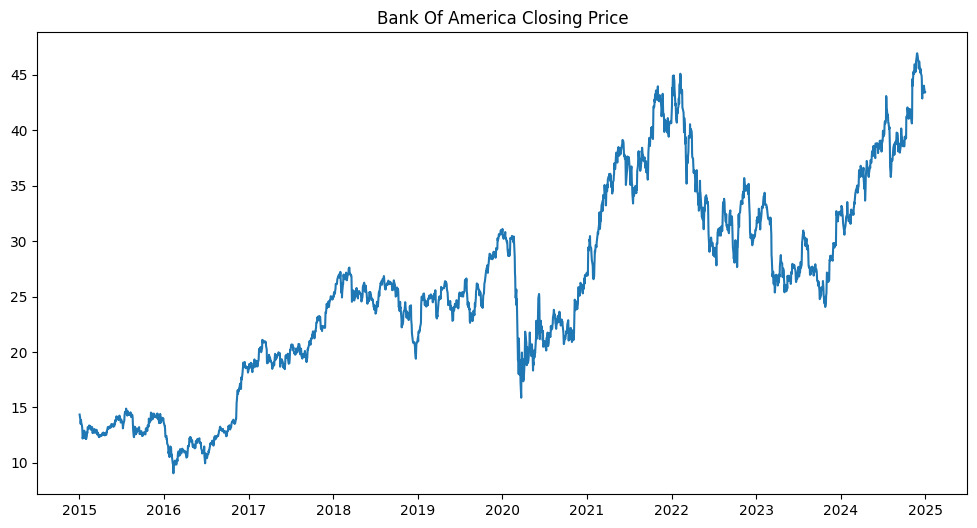

In [24]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.title("Bank Of America Closing Price")
plt.show()

#Preprocessing Data


In [25]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [26]:
window_size = 60
X, y = [], []
for i in range(window_size, len(scaled_data)-1):
    X.append(scaled_data[i-window_size:i, 0])
    y.append(scaled_data[i+1, 0])
X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))

#Train-Test Splitting

In [27]:
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]


#Define Models

In [28]:
def build_lstm():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [29]:
def build_gru():
    model = Sequential()
    model.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
    model.add(Dropout(0.2))
    model.add(GRU(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


#Train LSTM

In [30]:
lstm = build_lstm()
history_lstm = lstm.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - loss: 0.0409 - val_loss: 0.0023
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0030 - val_loss: 0.0016
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0029 - val_loss: 0.0018
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0027 - val_loss: 0.0021
Epoch 8/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 9/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0026 - val_loss: 0.0011
Epoch 10/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 11/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 12/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0021 - val_l

In [31]:
gru = build_gru()
history_gru = gru.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - loss: 0.0542 - val_loss: 9.4119e-04
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.0031 - val_loss: 8.2115e-04
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - loss: 0.0029 - val_loss: 7.9832e-04
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss: 0.0024 - val_loss: 8.7620e-04
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - loss: 0.0023 - val_loss: 8.4107e-04
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - loss: 0.0020 - val_loss: 7.4785e-04
Epoch 8/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 0.0020 - val_loss: 8.3843e-04
Epoch 9/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - loss: 0.0018 - val_loss: 8.7270e-04
Epoch 10/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 11/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 12/30
62/62 ━━━━━━

#Plot Validation loss

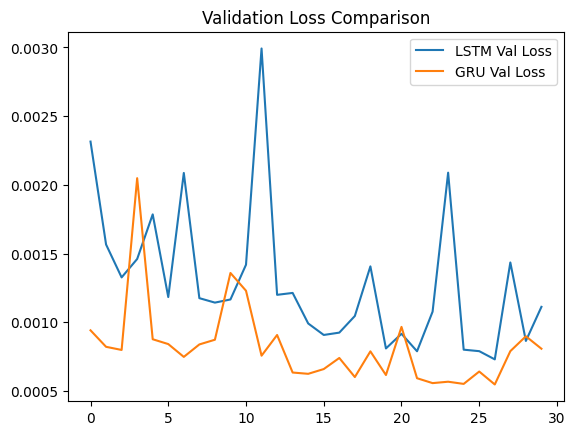

In [32]:
plt.plot(history_lstm.history['val_loss'], label="LSTM Val Loss")
plt.plot(history_gru.history['val_loss'], label="GRU Val Loss")
plt.legend()
plt.title("Validation Loss Comparison")
plt.show()


In [33]:
# 📌 Predictions
# LSTM
y_pred_lstm = lstm.predict(X_test)
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)
y_actual = scaler.inverse_transform(y_test.reshape(-1,1))
rmse_lstm = np.sqrt(mean_squared_error(y_actual, y_pred_lstm))

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step


In [34]:
# GRU
y_pred_gru = gru.predict(X_test)
y_pred_gru = scaler.inverse_transform(y_pred_gru)
rmse_gru = np.sqrt(mean_squared_error(y_actual, y_pred_gru))

print(f"LSTM RMSE: {rmse_lstm:.2f}")
print(f"GRU RMSE: {rmse_gru:.2f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step
LSTM RMSE: 1.26
GRU RMSE: 1.08


In [35]:
print(f"LSTM RMSE: {rmse_lstm:.2f}")
print(f"GRU RMSE: {rmse_gru:.2f}")

LSTM RMSE: 1.26
GRU RMSE: 1.08


#Plot Prediction

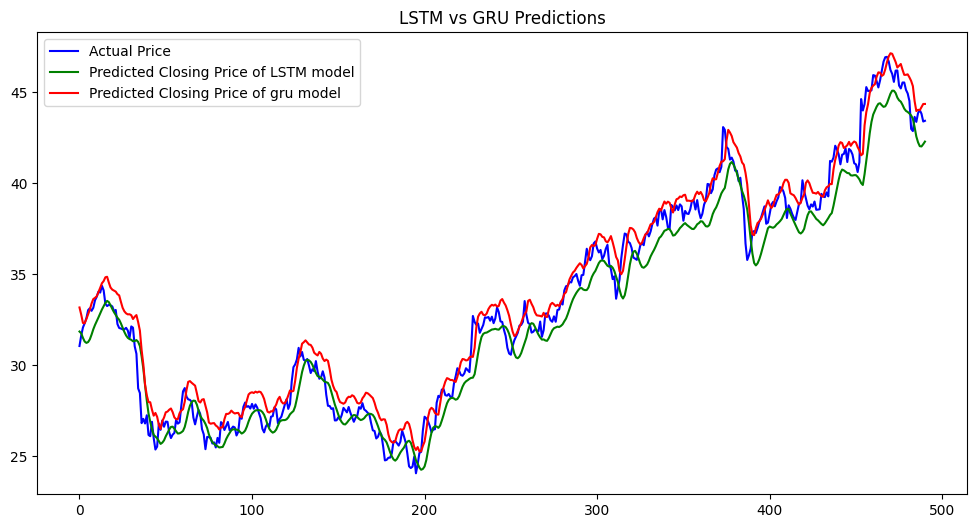

In [36]:
plt.figure(figsize=(12,6))
plt.plot(y_actual, label="Actual Price", color='blue')
plt.plot(y_pred_lstm, label="Predicted Closing Price of LSTM model", color='green')
plt.plot(y_pred_gru, label="Predicted Closing Price of gru model", color='red')
plt.legend()
plt.title("LSTM vs GRU Predictions")
plt.show()
